# Recreating figures from line game in Shafto 2014 

Setup: 

- 6 possible hypotheses $h_1$ through $h_6$ in hypothesis space 
- Uniform prior over hypotheses $P(h_{i}) = \frac{1}{6}$
- 12 data $d_1$ through $d_{12}$, where teacher reveals two segments that are labeled to be either inside the hypothesis or outside the hypothesis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
# create hypotheses array
h = np.array([
    [1, 0, 0], 
    [1, 1, 0], 
    [1, 1, 1], 
    [0, 1, 0], 
    [0, 1, 1], 
    [0, 0, 1]
])

# create data array
d = np.array([
    [1, 1, np.nan],
    [1, 0, np.nan], 
    [0, 1, np.nan], 
    [0, 0, np.nan], 
    [1, np.nan, 1], 
    [1, np.nan, 0], 
    [0, np.nan, 1],
    [0, np.nan, 0],
    [np.nan, 1, 1],
    [np.nan, 1, 0], 
    [np.nan, 0, 1],
    [np.nan, 0, 0]
])

# create mask for hypothesis array for NaN values
d_mask = np.ma.masked_invalid(d)

## Finding probabilities for iteration 0: $P(d|h)$, random sampling

In [3]:
d_possible = {}  # Set up dict of possible d for each h

rows = ['d_1', 'd_2', 'd_3', 'd_4', 
        'd_5', 'd_6', 'd_7', 'd_8', 
        'd_9', 'd_10', 'd_11', 'd_12']
columns = ['h_1', 'h_2', 'h_3', 'h_4', 'h_5', 'h_6']
df_0 = pd.DataFrame(index=rows, columns=columns).fillna(0)

# Loop over all combinations of h and d and fill dataframe with possible values
for row_h in range(h.shape[0]): 
    for row_d in range(d.shape[0]): 
        if np.array_equal(d[row_d][~d_mask.mask[row_d]], h[row_h][~d_mask.mask[row_d]]):
            d_possible.setdefault(row_h+1, []).append(row_d+1)
            df_0.iloc[row_d, row_h] = 1  # uniform distribution of data given each hypothesis
            
# Turn values into probabilities; each column sums up to 1
df_0 = df_0.div(df_0.sum(axis=0), axis=1)

In [4]:
# View combinations: Keys are indices for d and values are indices for h
d_possible

{1: [2, 6, 12],
 2: [1, 6, 10],
 3: [1, 5, 9],
 4: [3, 8, 10],
 5: [3, 7, 9],
 6: [4, 7, 11]}

In [5]:
# Iteration 0 probabilities
df_0

,h_1,h_2,h_3,h_4,h_5,h_6
d_1,0.000000,0.333333,0.333333,0.000000,0.000000,0.000000
d_2,0.333333,0.000000,0.000000,0.000000,0.000000,0.000000
d_3,0.000000,0.000000,0.000000,0.333333,0.333333,0.000000
d_4,0.000000,0.000000,0.000000,0.000000,0.000000,0.333333
d_5,0.000000,0.000000,0.333333,0.000000,0.000000,0.000000
d_6,0.333333,0.333333,0.000000,0.000000,0.000000,0.000000
d_7,0.000000,0.000000,0.000000,0.000000,0.333333,0.333333
d_8,0.000000,0.000000,0.000000,0.333333,0.000000,0.000000
d_9,0.000000,0.000000,0.333333,0.000000,0.333333,0.000000
d_10,0.000000,0.333333,0.000000,0.333333,0.000000,0.000000


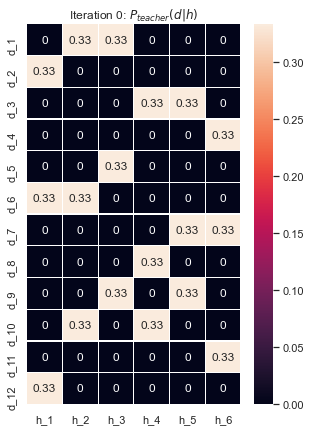

In [6]:
plt.figure(figsize=(4.8,7))
_ = sns.heatmap(df_0, annot=True, linewidths=0.25)
plt.title('Iteration 0: $P_{teacher} (d|h)$')

plt.show()

## Probabilities for iteration 1

In [7]:
df_1 = pd.DataFrame(index=rows, columns=columns).fillna(0)

Idea: 

$$ P_{learner}(h|d) = \frac{P_{teacher}(d|h) P(h)}{\sum_{h'} {P_{teacher}(d|h') P(h')}} $$

(prior probabilities of hypothesis are all $\frac{1}{6}$, so it cancels out)

$$ P_{teacher}(d|h) = \frac{P_{learner}(h|d) P(d)}{\sum_{d'} {P_{learner}(h|d')P(d')}} $$

(priors of d are the same for each iteration, too? should be one over number of possible data corresponding to each hypothesis) 

In [8]:
# P(h|d) for learner 
df_1 = df_0.div(df_0.sum(axis=1), axis=0)
df_1

,h_1,h_2,h_3,h_4,h_5,h_6
d_1,0.0,0.5,0.5,0.0,0.0,0.0
d_2,1.0,0.0,0.0,0.0,0.0,0.0
d_3,0.0,0.0,0.0,0.5,0.5,0.0
d_4,0.0,0.0,0.0,0.0,0.0,1.0
d_5,0.0,0.0,1.0,0.0,0.0,0.0
d_6,0.5,0.5,0.0,0.0,0.0,0.0
d_7,0.0,0.0,0.0,0.0,0.5,0.5
d_8,0.0,0.0,0.0,1.0,0.0,0.0
d_9,0.0,0.0,0.5,0.0,0.5,0.0
d_10,0.0,0.5,0.0,0.5,0.0,0.0


In [9]:
# New P(d|h) for teacher
df_1 = df_1.div(df_1.sum(axis=0), axis=1)
df_1

,h_1,h_2,h_3,h_4,h_5,h_6
d_1,0.0,0.333333,0.25,0.00,0.000000,0.0
d_2,0.4,0.000000,0.00,0.00,0.000000,0.0
d_3,0.0,0.000000,0.00,0.25,0.333333,0.0
d_4,0.0,0.000000,0.00,0.00,0.000000,0.4
d_5,0.0,0.000000,0.50,0.00,0.000000,0.0
d_6,0.2,0.333333,0.00,0.00,0.000000,0.0
d_7,0.0,0.000000,0.00,0.00,0.333333,0.2
d_8,0.0,0.000000,0.00,0.50,0.000000,0.0
d_9,0.0,0.000000,0.25,0.00,0.333333,0.0
d_10,0.0,0.333333,0.00,0.25,0.000000,0.0


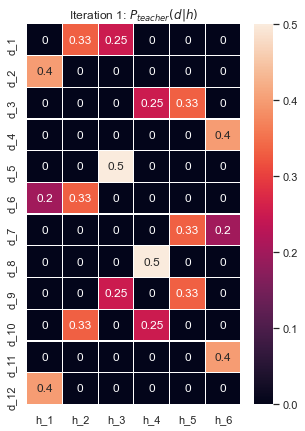

In [10]:
plt.figure(figsize=(4.8,7))
_ = sns.heatmap(df_1, annot=True, linewidths=0.25)
plt.title('Iteration 1: $P_{teacher} (d|h)$')

plt.show()

## Iterations 2 and beyond

In [11]:
def find_teacher_probabilities(n, df_0):
    '''
    given number of iterations n and P(d|h) matrix for iteration 0, find P(d|h) matrix after iteration n 
    '''
    n_iter = n
    df = df_0

    for n in range(n_iter): 
        df = df.div(df.sum(axis=1), axis=0)  # P(h|d)
        df = df.div(df.sum(axis=0), axis=1)  # P(d|h)
    
    return df

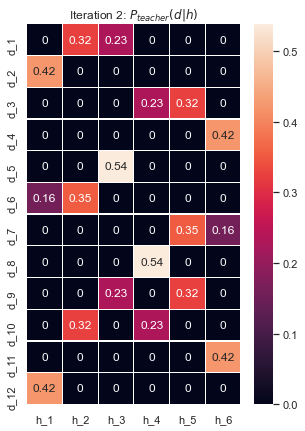

In [12]:
df_2 = find_teacher_probabilities(2, df_0)

plt.figure(figsize=(4.8,7))
_ = sns.heatmap(df_2, annot=True, linewidths=0.25)
plt.title('Iteration 2: $P_{teacher} (d|h)$')

plt.show()

Sanity check: $d_6$, iteration 2
$$ P_{teacher} (d_6 | h_2) = \frac{.33/.53}{(.33/.58) + (.33/.53) + (.33/.58)} \approx .354 $$

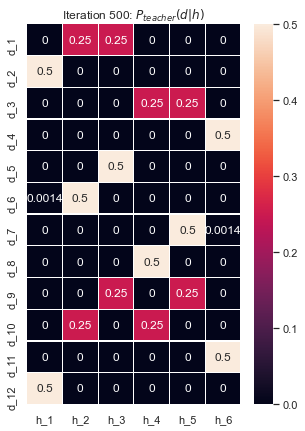

In [13]:
# Iteration 500

df_500 = find_teacher_probabilities(500, df_0)

plt.figure(figsize=(4.8,7))
_ = sns.heatmap(df_500, annot=True, linewidths=0.25)
plt.title('Iteration 500: $P_{teacher} (d|h)$')

plt.show()

In [ ]:
# pretty much looks like iteration n from the paper